In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("nist-predictions.csv", header=0, index_col=0)

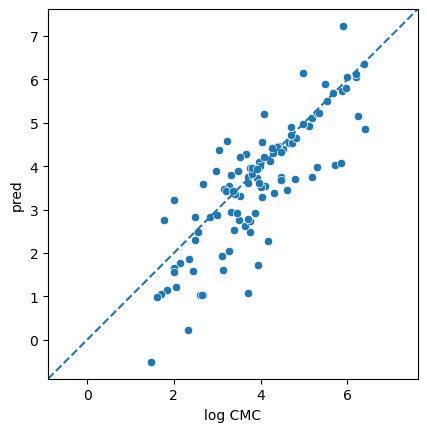

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="log CMC", y="pred", ax=ax)
lims = (min([*ax.get_xlim(), *ax.get_ylim()]), max([*ax.get_xlim(), *ax.get_ylim()]))
ax.plot(lims, lims, linestyle="--")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_aspect("equal")